In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Cargar metadatos
train_metadata_path = 'C:\\Users\\PCx\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata['isic_id'] = train_metadata['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64


In [2]:
# División en entrenamiento y validación
train_df, val_df = train_test_split(train_metadata, test_size=0.2, stratify=train_metadata['target'], random_state=42)


In [3]:
# Directorio de imágenes
image_dir = 'C:\\Users\\PCx\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),  # Ajustar el tamaño de las imágenes según sea necesario
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),  # Ajustar el tamaño de las imágenes según sea necesario
    class_mode='binary',
    batch_size=32
)


Found 320847 validated image filenames belonging to 2 classes.
Found 80212 validated image filenames belonging to 2 classes.


In [4]:
# Modelo base preentrenado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir capas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[early_stopping]
)


Epoch 1/10


C:\Users\PCx\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  246/10027 ━━━━━━━━━━━━━━━━━━━━ 1:01:50 379ms/step - accuracy: 0.9990 - loss: 0.0924

KeyboardInterrupt: 

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Cargar metadatos
train_metadata_path = 'C:\\Users\\PCx\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar duplicados
print(f"Duplicados en los datos: {train_metadata.duplicated().sum()}")

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata['isic_id'] = train_metadata['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento y validación
train_df, val_df = train_test_split(train_metadata, test_size=0.2, stratify=train_metadata['target'], random_state=42)

# Verificar distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\PCx\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Verificar algunas muestras del generador
for data_batch, labels_batch in train_generator:
    print(data_batch.shape, labels_batch.shape)
    break

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Modelo base preentrenado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir capas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Verificar que las capas del modelo base están congeladas
for layer in base_model.layers:
    assert layer.trainable == False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[early_stopping]
)

# Evaluación del modelo en el conjunto de validación
model.evaluate(val_generator)


Duplicados en los datos: 0
Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    320533
1       314
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    80133
1       79
Name: count, dtype: int64
Found 320847 validated image filenames belonging to 2 classes.
(32, 128, 128, 3) (32,)
Found 80212 validated image filenames belonging to 2 classes.
Epoch 1/10


C:\Users\PCx\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  116/10027 ━━━━━━━━━━━━━━━━━━━━ 1:03:28 384ms/step - accuracy: 0.8830 - loss: 0.2433

KeyboardInterrupt: 

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Cargar metadatos
train_metadata_path = 'C:\\Users\\PCx\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata['isic_id'] = train_metadata['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento y validación
train_df, val_df = train_test_split(train_metadata, test_size=0.2, stratify=train_metadata['target'], random_state=42)

# Directorio de imágenes
image_dir = 'C:\\Users\\PCx\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Calcular los pesos de las clases
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata['target'].astype(int)), y=train_metadata['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Modelo base preentrenado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir capas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento del modelo con class_weight
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de validación
model.evaluate(val_generator)


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Found 320847 validated image filenames belonging to 2 classes.
Found 80212 validated image filenames belonging to 2 classes.
Pesos de las clases: {0: 0.5004904334283418, 1: 510.25318066157763}
Epoch 1/10


C:\Users\PCx\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1254/10027 ━━━━━━━━━━━━━━━━━━━━ 54:14 371ms/step - accuracy: 0.6760 - loss: 0.7865

KeyboardInterrupt: 

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Cargar metadatos
train_metadata_path = 'C:\\Descargas\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata['isic_id'] = train_metadata['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata, test_size=0.3, stratify=train_metadata['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Descargas\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calcular los pesos de las clases
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata['target'].astype(int)), y=train_metadata['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Modelo base preentrenado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir capas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento del modelo con class_weight
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    280466
1       275
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    60100
1       59
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    60100
1       59
Name: count, dtype: int64
Found 280741 validated image filenames belonging to 2 classes.
Found 60159 validated image filenames belonging to 2 classes.
Found 60159 validated image filenames belonging to 2 classes.
Pesos de las clases: {0: 0.5004904334283418, 1: 510.25318066157763}
Epoch 1/10


C:\Users\PCx\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8774/8774 ━━━━━━━━━━━━━━━━━━━━ 3845s 437ms/step - accuracy: 0.4428 - loss: 0.7820 - val_accuracy: 0.0183 - val_loss: 0.7175
Epoch 2/10


C:\Users\PCx\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


AttributeError: 'NoneType' object has no attribute 'items'

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Descargas\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 1000
limit_0 = train_metadata[train_metadata['target'] == '0'].sample(n=1000, random_state=42)
all_1 = train_metadata[train_metadata['target'] == '1']
train_metadata_limited = pd.concat([limit_0, all_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Descargas\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calcular los pesos de las clases
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Modelo base preentrenado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir capas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento del modelo con class_weight
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Tarda\\Descargas\\isic-2024-challenge\\train-metadata.csv'

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 1000
limit_0 = train_metadata[train_metadata['target'] == '0'].sample(n=1000, random_state=42)
all_1 = train_metadata[train_metadata['target'] == '1']
train_metadata_limited = pd.concat([limit_0, all_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calcular los pesos de las clases
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Modelo base preentrenado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir capas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# Entrenamiento del modelo con class_weight
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    700
1    275
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    150
1     59
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    150
1     59
Name: count, dtype: int64
Found 975 validated image filenames belonging to 2 classes.
Found 209 validated image filenames belonging to 2 classes.
Found 209 validated image filenames belonging to 2 classes.
Pesos de las clases: {0: 0.6965, 1: 1.772264631043257}
Epoch 1/10


C:\Users\Tarda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 931ms/step - accuracy: 0.4096 - loss: 0.7537 - val_accuracy: 0.2823 - val_loss: 0.7051
Epoch 2/10


C:\Users\Tarda\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


AttributeError: 'NoneType' object has no attribute 'items'

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 1000
limit_0 = train_metadata[train_metadata['target'] == '0'].sample(n=1000, random_state=42)
all_1 = train_metadata[train_metadata['target'] == '1']
train_metadata_limited = pd.concat([limit_0, all_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calcular los pesos de las clases
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Modelo base preentrenado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir capas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento del modelo con class_weight
steps_per_epoch = len(train_df) // 32
validation_steps = len(val_df) // 32

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    700
1    275
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    150
1     59
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    150
1     59
Name: count, dtype: int64
Found 975 validated image filenames belonging to 2 classes.
Found 209 validated image filenames belonging to 2 classes.
Found 209 validated image filenames belonging to 2 classes.
Pesos de las clases: {0: 0.6965, 1: 1.772264631043257}
Epoch 1/10


C:\Users\Tarda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 976ms/step - accuracy: 0.4724 - loss: 0.6927 - val_accuracy: 0.2760 - val_loss: 0.7425
Epoch 2/10
 1/30 ━━━━━━━━━━━━━━━━━━━━ 28s 985ms/step - accuracy: 0.1875 - loss: 0.6501

C:\Users\Tarda\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.1875 - loss: 0.6501 - val_accuracy: 0.3529 - val_loss: 0.7224
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 906ms/step - accuracy: 0.4122 - loss: 0.6989 - val_accuracy: 0.7083 - val_loss: 0.6843
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6562 - loss: 0.7408 - val_accuracy: 0.8235 - val_loss: 0.6704
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 915ms/step - accuracy: 0.6261 - loss: 0.6957 - val_accuracy: 0.7135 - val_loss: 0.6561
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5938 - loss: 0.8203 - val_accuracy: 0.7647 - val_loss: 0.6471
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6160 - loss: 0.6876 - val_accuracy: 0.2917 - val_loss: 0.7228
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2500 - loss: 0.6762 - val_accuracy: 0.1765 - val_loss: 0.7343
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 953ms/step - accuracy: 0.4216 - loss: 0.7016 - val_accuracy: 0.7188 - val_los

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Descongelar las últimas capas del modelo base
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compilar el modelo nuevamente después de descongelar capas
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks adicionales
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# Reentrenar el modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Aumentar el número de épocas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 1000
limit_0 = train_metadata[train_metadata['target'] == '0'].sample(n=1000, random_state=42)
all_1 = train_metadata[train_metadata['target'] == '1']
train_metadata_limited = pd.concat([limit_0, all_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calcular los pesos de las clases
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Modelo base preentrenado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir capas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Entrenamiento del modelo con class_weight
steps_per_epoch = len(train_df) // 32
validation_steps = len(val_df) // 32

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Aumentar el número de épocas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    700
1    275
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    150
1     59
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    150
1     59
Name: count, dtype: int64
Found 975 validated image filenames belonging to 2 classes.
Found 209 validated image filenames belonging to 2 classes.
Found 209 validated image filenames belonging to 2 classes.
Pesos de las clases: {0: 0.6965, 1: 1.772264631043257}
Epoch 1/20


C:\Users\Tarda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5823 - loss: 0.6978 - val_accuracy: 0.2865 - val_loss: 0.7123 - learning_rate: 1.0000e-04
Epoch 2/20
 1/30 ━━━━━━━━━━━━━━━━━━━━ 22s 774ms/step - accuracy: 0.5312 - loss: 0.6863

C:\Users\Tarda\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.5312 - loss: 0.6863 - val_accuracy: 0.2353 - val_loss: 0.7077 - learning_rate: 1.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5237 - loss: 0.7146 - val_accuracy: 0.2812 - val_loss: 0.7011 - learning_rate: 1.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.4375 - loss: 0.7553 - val_accuracy: 0.2941 - val_loss: 0.6971 - learning_rate: 1.0000e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 974ms/step - accuracy: 0.5007 - loss: 0.7245 - val_accuracy: 0.7292 - val_loss: 0.6746 - learning_rate: 1.0000e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5625 - loss: 0.6255 - val_accuracy: 0.5882 - val_loss: 0.6844 - learning_rate: 1.0000e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5509 - loss: 0.7124 - val_accuracy: 0.2865 - val_loss: 0.7182 - learning_rate: 1.0000e-04
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3750 - loss: 0.7

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 10000
limit_0 = train_metadata[train_metadata['target'] == '0'].sample(n=10000, random_state=42)
# Aumentar las imágenes con la etiqueta 1 x10
all_1 = train_metadata[train_metadata['target'] == '1']
augmented_1 = pd.concat([all_1]*10, ignore_index=True)
train_metadata_limited = pd.concat([limit_0, augmented_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calcular los pesos de las clases más equilibrados
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Modelo base preentrenado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Añadir capas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Entrenamiento del modelo con class_weight
steps_per_epoch = len(train_df) // 32
validation_steps = len(val_df) // 32

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Aumentar el número de épocas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    7000
1    2751
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    1500
1     589
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    1500
1     590
Name: count, dtype: int64
Found 9751 validated image filenames belonging to 2 classes.
Found 2089 validated image filenames belonging to 2 classes.
Found 2090 validated image filenames belonging to 2 classes.
Pesos de las clases: {0: 0.6965, 1: 1.772264631043257}
Epoch 1/20


C:\Users\Tarda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 163s 475ms/step - accuracy: 0.4966 - loss: 0.7401 - val_accuracy: 0.6144 - val_loss: 0.6898 - learning_rate: 1.0000e-04
Epoch 2/20
  1/304 ━━━━━━━━━━━━━━━━━━━━ 1:25 283ms/step - accuracy: 0.2500 - loss: 0.7854

C:\Users\Tarda\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2500 - loss: 0.7854 - val_accuracy: 0.3333 - val_loss: 0.7045 - learning_rate: 1.0000e-04
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 108s 352ms/step - accuracy: 0.4842 - loss: 0.7237 - val_accuracy: 0.2827 - val_loss: 0.7189 - learning_rate: 1.0000e-04
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.5938 - loss: 0.6743 - val_accuracy: 0.4444 - val_loss: 0.6930 - learning_rate: 2.0000e-05
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 373ms/step - accuracy: 0.6161 - loss: 0.6893
Test Loss: 0.6894433498382568
Test Accuracy: 0.6114832758903503


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 10000
limit_0 = train_metadata[train_metadata['target'] == '0'].sample(n=10000, random_state=42)
# Aumentar las imágenes con la etiqueta 1 x10
all_1 = train_metadata[train_metadata['target'] == '1']
augmented_1 = pd.concat([all_1]*10, ignore_index=True)
train_metadata_limited = pd.concat([limit_0, augmented_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calcular los pesos de las clases más equilibrados
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Construcción del modelo ResNet-50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas de la base preentrenada
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Entrenamiento del modelo con class_weight
steps_per_epoch = len(train_df) // 32
validation_steps = len(val_df) // 32

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Aumentar el número de épocas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    7000
1    2751
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    1500
1     589
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    1500
1     590
Name: count, dtype: int64
Found 9751 validated image filenames belonging to 2 classes.
Found 2089 validated image filenames belonging to 2 classes.
Found 2090 validated image filenames belonging to 2 classes.
Pesos de las clases: {0: 0.6965, 1: 1.772264631043257}
Epoch 1/20


C:\Users\Tarda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 119s 330ms/step - accuracy: 0.4916 - loss: 0.7398 - val_accuracy: 0.2817 - val_loss: 0.7225 - learning_rate: 1.0000e-04
Epoch 2/20
  1/304 ━━━━━━━━━━━━━━━━━━━━ 1:01 202ms/step - accuracy: 0.5000 - loss: 0.6845

C:\Users\Tarda\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5000 - loss: 0.6845 - val_accuracy: 0.4444 - val_loss: 0.7011 - learning_rate: 1.0000e-04
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 100s 327ms/step - accuracy: 0.5072 - loss: 0.7139 - val_accuracy: 0.7288 - val_loss: 0.6659 - learning_rate: 1.0000e-04
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.5000 - loss: 0.6309 - val_accuracy: 0.4444 - val_loss: 0.6885 - learning_rate: 1.0000e-04
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 98s 322ms/step - accuracy: 0.5349 - loss: 0.7033 - val_accuracy: 0.2861 - val_loss: 0.7153 - learning_rate: 1.0000e-04
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.4375 - loss: 0.5960 - val_accuracy: 0.0000e+00 - val_loss: 0.7408 - learning_rate: 2.0000e-05
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - accuracy: 0.7457 - loss: 0.6633
Test Loss: 0.6654986143112183
Test Accuracy: 0.7263157963752747


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 20000 (doblar las imágenes usadas de clase 0)
limit_0 = pd.concat([train_metadata[train_metadata['target'] == '0']] * 2).sample(n=20000, random_state=42)
# Aumentar las imágenes con la etiqueta 1 mediante diferentes métodos de procesamiento
all_1 = train_metadata[train_metadata['target'] == '1']
augmented_1 = pd.concat([all_1] * 10, ignore_index=True)
train_metadata_limited = pd.concat([limit_0, augmented_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calcular los pesos de las clases más equilibrados
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Construcción del modelo ResNet-50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas de la base preentrenada
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Entrenamiento del modelo con class_weight
steps_per_epoch = len(train_df) // 32
validation_steps = len(val_df) // 32

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Aumentar el número de épocas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")



Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    14000
1     2751
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    3000
1     589
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    3000
1     590
Name: count, dtype: int64
Found 16751 validated image filenames belonging to 2 classes.
Found 3589 validated image filenames belonging to 2 classes.
Found 3590 validated image filenames belonging to 2 classes.
Pesos de las clases: {0: 0.59825, 1: 3.044529262086514}
Epoch 1/20


C:\Users\Tarda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/523 ━━━━━━━━━━━━━━━━━━━━ 3:41 426ms/step - accuracy: 0.7274 - loss: 0.7119

KeyboardInterrupt: 

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 20000 (doblar las imágenes usadas de clase 0)
limit_0 = pd.concat([train_metadata[train_metadata['target'] == '0']] * 2).sample(n=20000, random_state=42)
# Aumentar las imágenes con la etiqueta 1 mediante diferentes métodos de procesamiento
all_1 = train_metadata[train_metadata['target'] == '1']
augmented_1 = pd.concat([all_1] * 10, ignore_index=True)
train_metadata_limited = pd.concat([limit_0, augmented_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen_class_0 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen_class_1 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generadores de imágenes
def create_generators(df, image_dir, batch_size=32, target_size=(50, 50), class_mode='binary'):
    df_class_0 = df[df['target'] == '0']
    df_class_1 = df[df['target'] == '1']
    
    generator_class_0 = train_datagen_class_0.flow_from_dataframe(
        df_class_0,
        directory=image_dir,
        x_col='isic_id',
        y_col='target',
        target_size=target_size,
        class_mode=class_mode,
        batch_size=batch_size,
        shuffle=True
    )
    
    generator_class_1 = train_datagen_class_1.flow_from_dataframe(
        df_class_1,
        directory=image_dir,
        x_col='isic_id',
        y_col='target',
        target_size=target_size,
        class_mode=class_mode,
        batch_size=batch_size,
        shuffle=True
    )
    
    return generator_class_0, generator_class_1

train_generator_class_0, train_generator_class_1 = create_generators(train_df, image_dir)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Mezclar generadores de clase 0 y clase 1 para el entrenamiento
def combined_generator(gen_class_0, gen_class_1):
    while True:
        x_class_0, y_class_0 = gen_class_0.next()
        x_class_1, y_class_1 = gen_class_1.next()
        x_combined = np.concatenate((x_class_0, x_class_1), axis=0)
        y_combined = np.concatenate((y_class_0, y_class_1), axis=0)
        yield x_combined, y_combined

train_generator = combined_generator(train_generator_class_0, train_generator_class_1)

# Calcular los pesos de las clases más equilibrados
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Construcción del modelo ResNet-50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas de la base preentrenada
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Entrenamiento del modelo con class_weight
steps_per_epoch = len(train_df) // (32*2)
validation_steps = len(val_df) // 32

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Aumentar el número de épocas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    14000
1     2751
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    3000
1     589
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    3000
1     590
Name: count, dtype: int64


ValueError: If class_mode="binary" there must be 2 classes. Found 1 classes.

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 20000 (doblar las imágenes usadas de clase 0)
limit_0 = pd.concat([train_metadata[train_metadata['target'] == '0']] * 2).sample(n=20000, random_state=42)
# Aumentar las imágenes con la etiqueta 1 mediante diferentes métodos de procesamiento
all_1 = train_metadata[train_metadata['target'] == '1']
augmented_1 = pd.concat([all_1] * 10, ignore_index=True)
train_metadata_limited = pd.concat([limit_0, augmented_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generadores de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes aumentadas para la clase 1
augmented_generator_class_1 = augmented_datagen.flow_from_dataframe(
    all_1,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Mezclar generadores de clase 0 y clase 1 para el entrenamiento
def combined_generator(gen_class_0, gen_class_1):
    while True:
        x_class_0, y_class_0 = gen_class_0.next()
        x_class_1, y_class_1 = gen_class_1.next()
        x_combined = np.concatenate((x_class_0, x_class_1), axis=0)
        y_combined = np.concatenate((y_class_0, y_class_1), axis=0)
        yield x_combined, y_combined

train_generator_combined = combined_generator(train_generator, augmented_generator_class_1)

# Calcular los pesos de las clases más equilibrados
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Construcción del modelo ResNet-50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas de la base preentrenada
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Entrenamiento del modelo con class_weight
steps_per_epoch = len(train_df) // 32
validation_steps = len(val_df) // 32

history = model.fit(
    train_generator_combined,
    validation_data=val_generator,
    epochs=20,  # Aumentar el número de épocas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    14000
1     2751
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    3000
1     589
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    3000
1     590
Name: count, dtype: int64
Found 16751 validated image filenames belonging to 2 classes.


ValueError: If class_mode="binary" there must be 2 classes. Found 1 classes.

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 10000
limit_0 = train_metadata[train_metadata['target'] == '0'].sample(n=10000, random_state=42)
# Aumentar las imágenes con la etiqueta 1 x10
all_1 = train_metadata[train_metadata['target'] == '1']
augmented_1 = pd.concat([all_1]*10, ignore_index=True)
train_metadata_limited = pd.concat([limit_0, augmented_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(50, 50),  # Reducir resolución a 50x50
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calcular los pesos de las clases más equilibrados
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Construcción del modelo ResNet-50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas de la base preentrenada
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Entrenamiento del modelo con class_weight
steps_per_epoch = len(train_df) // 32
validation_steps = len(val_df) // 32

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,  # Aumentar el número de épocas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    7000
1    2751
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    1500
1     589
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    1500
1     590
Name: count, dtype: int64
Found 9751 validated image filenames belonging to 2 classes.
Found 2089 validated image filenames belonging to 2 classes.
Found 2090 validated image filenames belonging to 2 classes.
Pesos de las clases: {0: 0.6965, 1: 1.772264631043257}
Epoch 1/30


C:\Users\Tarda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 148s 435ms/step - accuracy: 0.5105 - loss: 0.7339 - val_accuracy: 0.6889 - val_loss: 0.6886 - learning_rate: 1.0000e-04
Epoch 2/30
  1/304 ━━━━━━━━━━━━━━━━━━━━ 1:38 326ms/step - accuracy: 0.4062 - loss: 0.8249

C:\Users\Tarda\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4062 - loss: 0.8249 - val_accuracy: 0.7778 - val_loss: 0.6894 - learning_rate: 1.0000e-04
Epoch 3/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 113s 369ms/step - accuracy: 0.5087 - loss: 0.7110 - val_accuracy: 0.7284 - val_loss: 0.6648 - learning_rate: 1.0000e-04
Epoch 4/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5312 - loss: 0.7555 - val_accuracy: 0.6667 - val_loss: 0.6766 - learning_rate: 1.0000e-04
Epoch 5/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 109s 357ms/step - accuracy: 0.5043 - loss: 0.7120 - val_accuracy: 0.3577 - val_loss: 0.6987 - learning_rate: 1.0000e-04
Epoch 6/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5938 - loss: 0.6455 - val_accuracy: 0.3333 - val_loss: 0.7069 - learning_rate: 1.0000e-04
Epoch 7/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 104s 340ms/step - accuracy: 0.5060 - loss: 0.7020 - val_accuracy: 0.6606 - val_loss: 0.6838 - learning_rate: 2.0000e-05
Epoch 8/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accurac

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 10000
limit_0 = train_metadata[train_metadata['target'] == '0'].sample(n=10000, random_state=42)
# Aumentar las imágenes con la etiqueta 1 x10
all_1 = train_metadata[train_metadata['target'] == '1']
augmented_1 = pd.concat([all_1]*10, ignore_index=True)
train_metadata_limited = pd.concat([limit_0, augmented_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),  # Incrementar resolución
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),  # Incrementar resolución
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(128, 128),  # Incrementar resolución
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calcular los pesos de las clases más equilibrados
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Construcción del modelo ResNet-50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Descongelar más capas del modelo base para el ajuste fino
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.000001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Entrenamiento del modelo con class_weight
steps_per_epoch = len(train_df) // 32
validation_steps = len(val_df) // 32

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Aumentar el número de épocas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    7000
1    2751
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    1500
1     589
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    1500
1     590
Name: count, dtype: int64
Found 9751 validated image filenames belonging to 2 classes.
Found 2089 validated image filenames belonging to 2 classes.
Found 2090 validated image filenames belonging to 2 classes.
Pesos de las clases: {0: 0.6965, 1: 1.772264631043257}
Epoch 1/50


C:\Users\Tarda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 1478s 5s/step - accuracy: 0.5716 - loss: 0.9247 - val_accuracy: 0.2822 - val_loss: 14.8042 - learning_rate: 1.0000e-05
Epoch 2/50
  1/304 ━━━━━━━━━━━━━━━━━━━━ 25:08 5s/step - accuracy: 0.6875 - loss: 0.6114

C:\Users\Tarda\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


304/304 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6875 - loss: 0.6114 - val_accuracy: 0.2222 - val_loss: 15.8255 - learning_rate: 1.0000e-05
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1449s 5s/step - accuracy: 0.7077 - loss: 0.6636 - val_accuracy: 0.2865 - val_loss: 25.9002 - learning_rate: 1.0000e-05
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6875 - loss: 0.5265 - val_accuracy: 0.3333 - val_loss: 29.0792 - learning_rate: 1.0000e-05
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1174s 4s/step - accuracy: 0.7434 - loss: 0.6162 - val_accuracy: 0.6538 - val_loss: 1.6263 - learning_rate: 2.0000e-06
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5938 - loss: 0.5806 - val_accuracy: 0.5556 - val_loss: 0.7554 - learning_rate: 2.0000e-06
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1158s 4s/step - accuracy: 0.7606 - loss: 0.5770 - val_accuracy: 0.8394 - val_loss: 0.3841 - learning_rate: 2.0000e-06
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 

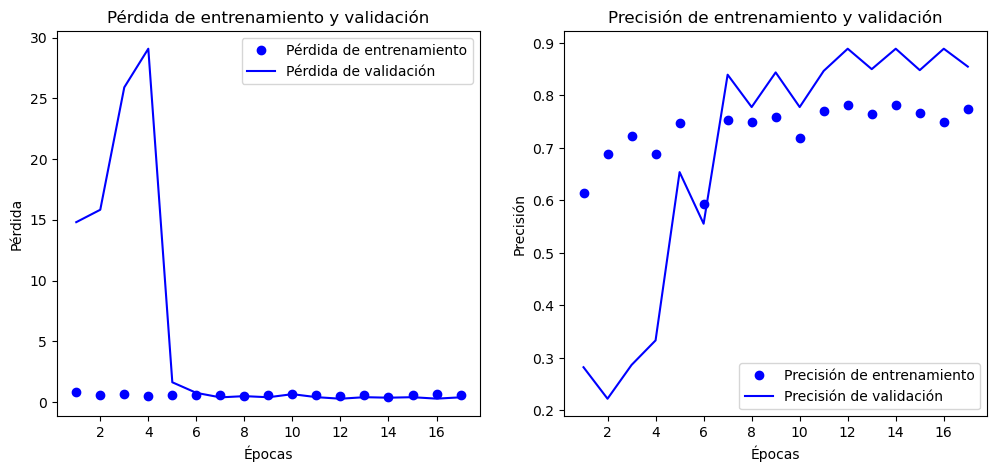

In [35]:
import matplotlib.pyplot as plt

# Historia del entrenamiento
history_dict = history.history

# Gráficos de pérdida y precisión
epochs = range(1, len(history_dict['loss']) + 1)

# Gráfico de la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de la precisión de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


Epoch 1/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1413s 4s/step - accuracy: 0.6252 - loss: 2.8593 - val_accuracy: 0.8322 - val_loss: 2.4554 - learning_rate: 1.0000e-05
Epoch 2/100
  1/304 ━━━━━━━━━━━━━━━━━━━━ 19:08 4s/step - accuracy: 0.7500 - loss: 2.7595

C:\Users\Tarda\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


304/304 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.7500 - loss: 2.7595 - val_accuracy: 1.0000 - val_loss: 2.2705 - learning_rate: 1.0000e-05
Epoch 3/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1146s 4s/step - accuracy: 0.7564 - loss: 2.6097 - val_accuracy: 0.8447 - val_loss: 2.4302 - learning_rate: 1.0000e-05
Epoch 4/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8438 - loss: 2.4758 - val_accuracy: 0.6667 - val_loss: 3.0811 - learning_rate: 1.0000e-05
Epoch 5/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1143s 4s/step - accuracy: 0.7854 - loss: 2.5716 - val_accuracy: 0.8601 - val_loss: 2.3872 - learning_rate: 1.0000e-05
Epoch 6/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8125 - loss: 2.5166 - val_accuracy: 0.6667 - val_loss: 2.8772 - learning_rate: 1.0000e-05
Epoch 7/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1364s 4s/step - accuracy: 0.8051 - loss: 2.5342 - val_accuracy: 0.8635 - val_loss: 2.3779 - learning_rate: 1.0000e-05
Epoch 8/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accur

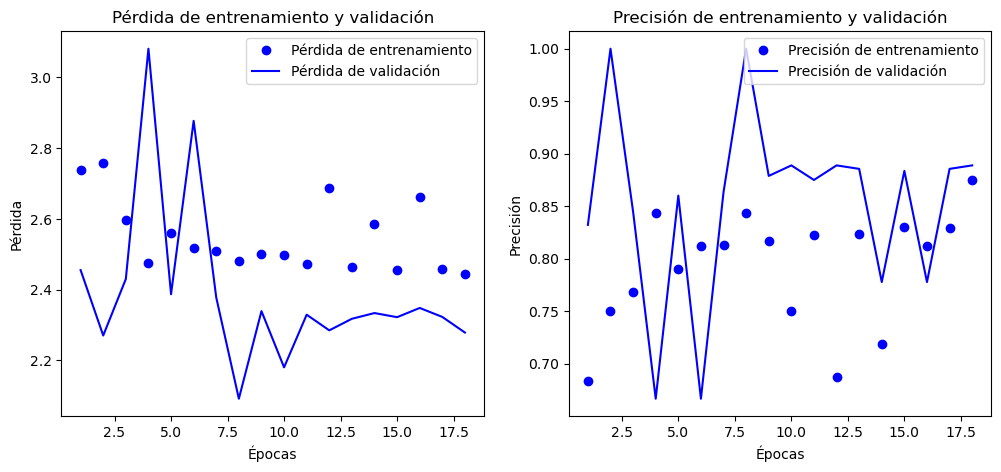

In [37]:
from tensorflow.keras.regularizers import l2

# Añadir capas personalizadas con L2 regularización
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)  # Agregar regularización L2
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)  # Agregar regularización L2
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Descongelar más capas del modelo base para el ajuste fino
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Aumentar paciencia
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Entrenamiento del modelo con class_weight
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,  # Aumentar el número de épocas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Visualización de los gráficos de pérdida y precisión
history_dict = history.history

# Gráficos de pérdida y precisión
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 735s 2s/step - accuracy: 0.5190 - loss: 2.8111 - val_accuracy: 0.3019 - val_loss: 31.2814 - learning_rate: 1.0000e-04
Epoch 2/100
  1/304 ━━━━━━━━━━━━━━━━━━━━ 9:18 2s/step - accuracy: 0.6250 - loss: 2.5927

C:\Users\Tarda\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6250 - loss: 2.5927 - val_accuracy: 0.2222 - val_loss: 29.7869 - learning_rate: 1.0000e-04
Epoch 3/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 617s 2s/step - accuracy: 0.5866 - loss: 2.6443 - val_accuracy: 0.5524 - val_loss: 3.2836 - learning_rate: 1.0000e-04
Epoch 4/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7188 - loss: 2.4032 - val_accuracy: 0.5556 - val_loss: 2.8735 - learning_rate: 1.0000e-04
Epoch 5/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 617s 2s/step - accuracy: 0.6459 - loss: 2.5342 - val_accuracy: 0.7817 - val_loss: 2.3005 - learning_rate: 1.0000e-04
Epoch 6/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.5938 - loss: 2.6779 - val_accuracy: 0.7778 - val_loss: 2.3678 - learning_rate: 1.0000e-04
Epoch 7/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - accuracy: 0.6841 - loss: 2.4815 - val_accuracy: 0.8144 - val_loss: 2.2574 - learning_rate: 1.0000e-04
Epoch 8/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy:

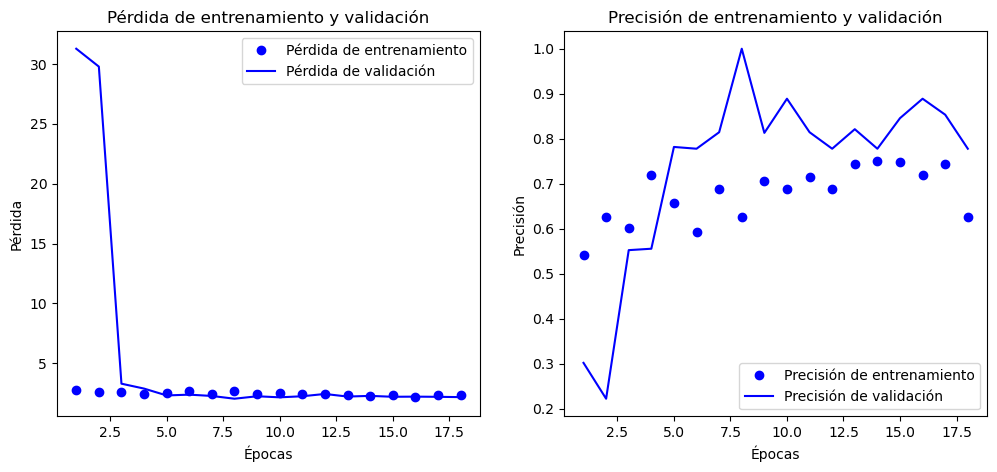

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Generador de datos con aumento adicional
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Agregar volteo vertical
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Definir el modelo base (por ejemplo, EfficientNetB0)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Descongelar más capas del modelo base para el ajuste fino
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compilar el modelo con SGD
optimizer = SGD(learning_rate=0.0001, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Visualización de los gráficos de pérdida y precisión
import matplotlib.pyplot as plt

history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

# Cargar metadatos
train_metadata_path = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-metadata.csv'
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Verificar los valores únicos en la columna 'target'
print("Valores únicos en 'target':", train_metadata['target'].unique())

# Contar la frecuencia de cada valor en la columna 'target'
value_counts = train_metadata['target'].value_counts()
print("Conteo de valores en 'target':")
print(value_counts)

# Convertir los valores de la columna 'target' a cadenas
train_metadata['target'] = train_metadata['target'].astype(str)

# Limitar las imágenes con la etiqueta 0 a un máximo de 10000
limit_0 = train_metadata[train_metadata['target'] == '0'].sample(n=10000, random_state=42)
# Aumentar las imágenes con la etiqueta 1 x10
all_1 = train_metadata[train_metadata['target'] == '1']
augmented_1 = pd.concat([all_1]*10, ignore_index=True)
train_metadata_limited = pd.concat([limit_0, augmented_1]).reset_index(drop=True)

# Agregar la extensión .jpg a los valores de isic_id si no la tienen
train_metadata_limited['isic_id'] = train_metadata_limited['isic_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)

# División en entrenamiento, validación y prueba
train_df, temp_df = train_test_split(train_metadata_limited, test_size=0.3, stratify=train_metadata_limited['target'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())
print("Distribución de clases en el conjunto de validación:")
print(val_df['target'].value_counts())
print("Distribución de clases en el conjunto de prueba:")
print(test_df['target'].value_counts())

# Directorio de imágenes
image_dir = 'C:\\Users\\Tarda\\Downloads\\isic-2024-challenge\\train-image\\image'

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de imágenes de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(224, 224),  # Incrementar resolución
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(224, 224),  # Incrementar resolución
    class_mode='binary',
    batch_size=32
)

# Generador de imágenes de prueba
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=image_dir,
    x_col='isic_id',
    y_col='target',
    target_size=(224, 224),  # Incrementar resolución
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calcular los pesos de las clases más equilibrados
class_weights = compute_class_weight('balanced', classes=np.unique(train_metadata_limited['target'].astype(int)), y=train_metadata_limited['target'].astype(int))
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weight_dict)

# Construcción del modelo ResNet-50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Descongelar más capas del modelo base para el ajuste fino
for layer in base_model.layers[-50:]:  # Descongelar más capas
    layer.trainable = True

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Aumentar paciencia
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Entrenamiento del modelo con class_weight
steps_per_epoch = len(train_df) // 32
validation_steps = len(val_df) // 32

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,  # Aumentar el número de épocas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Valores únicos en 'target': [0 1]
Conteo de valores en 'target':
target
0    400666
1       393
Name: count, dtype: int64
Distribución de clases en el conjunto de entrenamiento:
target
0    7000
1    2751
Name: count, dtype: int64
Distribución de clases en el conjunto de validación:
target
0    1500
1     589
Name: count, dtype: int64
Distribución de clases en el conjunto de prueba:
target
0    1500
1     590
Name: count, dtype: int64
Found 9751 validated image filenames belonging to 2 classes.
Found 2089 validated image filenames belonging to 2 classes.
Found 2090 validated image filenames belonging to 2 classes.
Pesos de las clases: {0: 0.6965, 1: 1.772264631043257}
Epoch 1/100


C:\Users\Tarda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 3898s 12s/step - accuracy: 0.5485 - loss: 0.9632 - val_accuracy: 0.2827 - val_loss: 27.6945 - learning_rate: 1.0000e-05
Epoch 2/100
  1/304 ━━━━━━━━━━━━━━━━━━━━ 59:37 12s/step - accuracy: 0.7500 - loss: 0.5505

C:\Users\Tarda\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


304/304 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7500 - loss: 0.5505 - val_accuracy: 0.1111 - val_loss: 35.3244 - learning_rate: 1.0000e-05
Epoch 3/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 3655s 12s/step - accuracy: 0.6855 - loss: 0.6696 - val_accuracy: 0.2851 - val_loss: 9.5754 - learning_rate: 1.0000e-05
Epoch 4/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8750 - loss: 0.4765 - val_accuracy: 0.3333 - val_loss: 9.5221 - learning_rate: 1.0000e-05
Epoch 5/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 3574s 12s/step - accuracy: 0.7429 - loss: 0.5911 - val_accuracy: 0.6889 - val_loss: 0.6257 - learning_rate: 1.0000e-05
Epoch 6/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8125 - loss: 0.7525 - val_accuracy: 0.7778 - val_loss: 0.4366 - learning_rate: 1.0000e-05
Epoch 7/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 3567s 12s/step - accuracy: 0.7821 - loss: 0.5190 - val_accuracy: 0.8524 - val_loss: 0.3634 - learning_rate: 1.0000e-05
Epoch 8/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step 

In [3]:
model.save('model.h5')

In [5]:
model.save('saved_model/')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=saved_model/.

In [9]:
# Guardar el modelo en formato .keras
model.save('C:\\Users\\Tarda\\model.keras')


In [13]:
model.save('C:\\Users\\Tarda\\saved_model')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=C:\Users\Tarda\saved_model.